In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
import xgboost as xg
path = "Dataset.xlsx"

In [2]:
file = pd.ExcelFile(path)

dfs = {sheet_name: file.parse(sheet_name) 
          for sheet_name in file.sheet_names}

In [3]:
dfs.keys()

dict_keys(['Material_Data_Dict', 'Comp_Data_Dict', 'CS', 'SS(Ave)', 'SS1', 'SS2', 'FE', 'AT1', 'AT2', 'AT3', 'AT4', 'AT5', 'AT(Ave)'])

In [4]:
class DataCreator:
    
    def __init__(self, path):
        file = pd.ExcelFile(path)
        dfs = {sheet_name: file.parse(sheet_name) 
          for sheet_name in file.sheet_names}
        self.dfs = dfs
        colsa = ['BOD','NH3-N','PH','TN'] # ss avg columns
        colsb = ['MLSS', 'AT_Temp'] # at avg columns
        self.df = pd.concat([ dfs['SS(Ave)'][colsa] , dfs['AT(Ave)'][colsb] ], axis = 1)
        self.odf = dfs['FE'][['BOD', "NH3-N", 'TN']]
    
    def get_bod(self):
        dfs = self.dfs
        self.bod = dfs['FE']['BOD']
        self.bod = self.bod.rename('BOD_Y')
        return self.bod
        #display(self.bod)
    def get_nh3(self):
        dfs = self.dfs
        self.nh3 = dfs['FE']['NH3-N']
        self.nh3 = self.nh3.rename('NH3_Y')
        return self.nh3
        #display(self.nh3)
    def get_tn(self):
        dfs = self.dfs
        self.tn = dfs['FE']['TN']
        self.tn = self.bod.rename('TN_Y')
        return self.tn
        #display(self.tn)
        
    def first_df(self):
        return pd.concat([self.df, self.get_bod()], axis = 1)
    def second_df(self):
        return pd.concat([self.df, self.get_nh3()], axis = 1)
    def third_df(self):
        return pd.concat([self.df, self.get_tn()], axis = 1)
        

In [5]:
dc = DataCreator(path)
dc.df

,BOD,NH3-N,PH,TN,MLSS,AT_Temp
0,NaN,25.0,7.4,NaN,NaN,21.350
1,NaN,NaN,NaN,NaN,2540.0,21.850
2,120.0,31.0,8.1,45.0,NaN,22.400
3,NaN,NaN,NaN,NaN,2230.0,21.975
4,NaN,NaN,NaN,NaN,NaN,21.100
...,...,...,...,...,...,...
2186,120.0,31.0,7.3,56.0,3430.0,23.150
2187,NaN,NaN,NaN,NaN,3330.0,21.925
2188,NaN,NaN,NaN,NaN,NaN,21.075
2189,NaN,29.0,7.2,NaN,NaN,20.700


In [6]:
ind = dc.get_bod().notna()
ind

0        True
1       False
2        True
3       False
4       False
        ...  
2186     True
2187    False
2188    False
2189    False
2190    False
Name: BOD_Y, Length: 2191, dtype: bool

In [7]:
dc.odf[ind]

,BOD,NH3-N,TN
0,5.0,0.50,9.4
2,5.0,0.54,11.0
7,5.0,0.59,8.9
8,5.0,0.70,NaN
9,5.0,0.98,12.0
...,...,...,...
2178,5.0,0.50,NaN
2179,5.0,0.50,4.7
2184,5.0,0.50,3.9
2185,5.0,0.50,NaN


In [8]:
df1 = dc.first_df()
df2 = dc.second_df()
df3 = dc.third_df()
display(df1)
display(df2)
display(df3)

,BOD,NH3-N,PH,TN,MLSS,AT_Temp,BOD_Y
0,NaN,25.0,7.4,NaN,NaN,21.350,5.0
1,NaN,NaN,NaN,NaN,2540.0,21.850,NaN
2,120.0,31.0,8.1,45.0,NaN,22.400,5.0
3,NaN,NaN,NaN,NaN,2230.0,21.975,NaN
4,NaN,NaN,NaN,NaN,NaN,21.100,NaN
...,...,...,...,...,...,...,...
2186,120.0,31.0,7.3,56.0,3430.0,23.150,5.0
2187,NaN,NaN,NaN,NaN,3330.0,21.925,NaN
2188,NaN,NaN,NaN,NaN,NaN,21.075,NaN
2189,NaN,29.0,7.2,NaN,NaN,20.700,NaN


,BOD,NH3-N,PH,TN,MLSS,AT_Temp,NH3_Y
0,NaN,25.0,7.4,NaN,NaN,21.350,0.50
1,NaN,NaN,NaN,NaN,2540.0,21.850,NaN
2,120.0,31.0,8.1,45.0,NaN,22.400,0.54
3,NaN,NaN,NaN,NaN,2230.0,21.975,NaN
4,NaN,NaN,NaN,NaN,NaN,21.100,NaN
...,...,...,...,...,...,...,...
2186,120.0,31.0,7.3,56.0,3430.0,23.150,0.50
2187,NaN,NaN,NaN,NaN,3330.0,21.925,NaN
2188,NaN,NaN,NaN,NaN,NaN,21.075,NaN
2189,NaN,29.0,7.2,NaN,NaN,20.700,0.50


,BOD,NH3-N,PH,TN,MLSS,AT_Temp,TN_Y
0,NaN,25.0,7.4,NaN,NaN,21.350,5.0
1,NaN,NaN,NaN,NaN,2540.0,21.850,NaN
2,120.0,31.0,8.1,45.0,NaN,22.400,5.0
3,NaN,NaN,NaN,NaN,2230.0,21.975,NaN
4,NaN,NaN,NaN,NaN,NaN,21.100,NaN
...,...,...,...,...,...,...,...
2186,120.0,31.0,7.3,56.0,3430.0,23.150,5.0
2187,NaN,NaN,NaN,NaN,3330.0,21.925,NaN
2188,NaN,NaN,NaN,NaN,NaN,21.075,NaN
2189,NaN,29.0,7.2,NaN,NaN,20.700,NaN


In [9]:
df1.columns

Index(['BOD', 'NH3-N', 'PH', 'TN', 'MLSS', 'AT_Temp', 'BOD_Y'], dtype='object')

<AxesSubplot:>

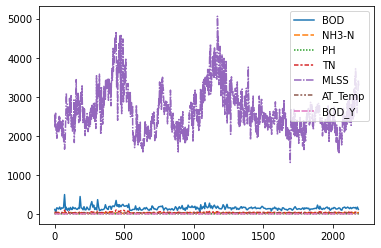

In [10]:
sns.lineplot(data = dc.first_df())

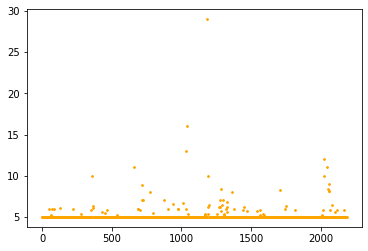

In [11]:
#plt.plot(df1.index, df1['BOD_Y'])
plt.scatter(df1.index, df1['BOD_Y'], s = 3, color = 'orange')
plt.show()

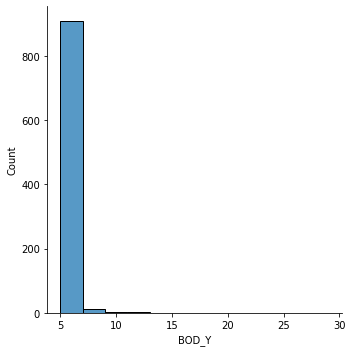

In [21]:
sns.displot(df1, x = "BOD_Y", binwidth=2) # DATA IS HIGHLY IMBALANCED

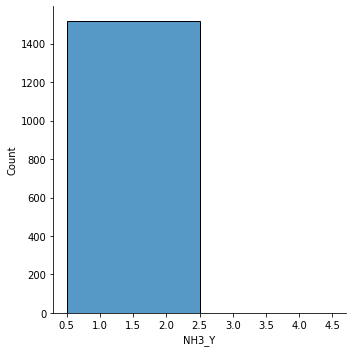

In [22]:
sns.displot(df2, x = "NH3_Y", binwidth=2) # DATA IS BALANCED

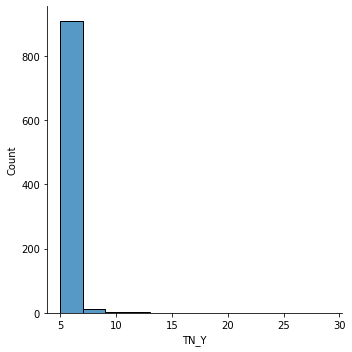

In [23]:
sns.displot(df3, x = "TN_Y", binwidth=2) # DATA IS HIGHLY IMBALANCED

In [170]:
class DataCleaner():
    
    def __init__(self, df, c):
        self.df = df
        global col
        col = c
        self.rem_dup()
        self.rem_nan()
        self.rem_low()
    
    def rem_dup(self):
        x = self.df.drop(col, axis = 1, inplace = False)
        y = pd.DataFrame(self.df[col])
        self.x = x 
        self.y = y
    def rem_nan(self):
        ind = self.y[col].notna()
        self.x = self.x[ind]*10
        self.y = self.y[ind]*10
    
    def rem_low(self):
        s=self.y[col].value_counts().gt(4)
        ind = self.y[col].isin(s[s].index)
        
        self.x = self.x[ind]
        self.y = self.y[ind]
        self.x = self.x.fillna(0)
        

In [171]:
dc = DataCleaner(df1, 'BOD_Y')
dc.y['BOD_Y'].value_counts()
x = dc.x
y = dc.y

In [172]:
xr, yr = SMOTE(k_neighbors=3).fit_resample(x, y)
xr = xr/10
yr = yr/10

In [173]:
yr['BOD_Y'].value_counts()

6.0    848
5.0    848
5.8    848
5.4    848
5.2    848
6.2    848
Name: BOD_Y, dtype: int64

In [174]:
yr

,BOD_Y
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0
...,...
5083,6.2
5084,6.2
5085,6.2
5086,6.2


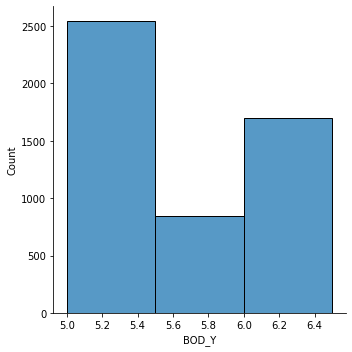

In [175]:
sns.displot(yr, x = "BOD_Y", binwidth=0.5)

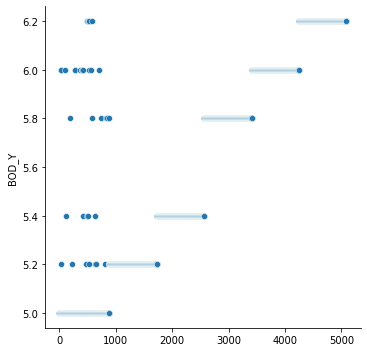

In [176]:
tdf = pd.concat([xr, yr], axis = 1)
sns.relplot(data = tdf, y = 'BOD_Y', x = tdf.index)
plt.show()

In [177]:
tdf['BOD_Y'].value_counts()

6.0    848
5.0    848
5.8    848
5.4    848
5.2    848
6.2    848
Name: BOD_Y, dtype: int64

In [103]:
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as loss
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [111]:
def tell(x,y, ch = 'rf'):
    print(ch)
    if ch == 'xg':
        clf = xg.XGBRegressor()
    elif ch == 'rf':
        clf = RandomForestRegressor()
    x_train, x_test, y_train, y_test = train_test_split(x, y)
    clf.fit(x_train, y_train)
    y_pred_te = clf.predict(x_test)
    print(loss(y_pred_te, y_test), 'test')
    y_pred_tr = clf.predict(x_train)
    print(loss(y_pred_tr, y_train), 'train')
    return y_pred_tr, y_pred_te

In [159]:
y_tr, y_te = tell(tx, ty, 'rf')

rf
0.048924108597285104 test
0.0034795113122171877 train


<ipython-input-111-b2385d31a66d>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


In [160]:
y_tr, y_te = tell(xr,yr, 'xg')

xg
0.015381641833581832 test
0.0010398524139438984 train


In [161]:
x_train, x_test, y_train, y_test = train_test_split(xr, yr)
clf = xg.XGBRegressor()
clf.fit(x_train, y_train)

p_train = clf.predict(x_train)
p_test = clf.predict(x_test)
ind = p_test<5
p_test[ind] = 5
ind = p_train<5
p_train[ind] = 5

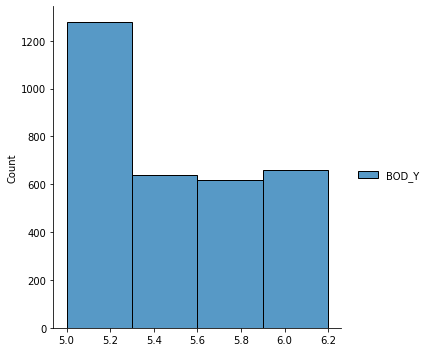

In [164]:
sns.displot(y_train, binwidth=0.3) # ORIGINAL TEST DATA

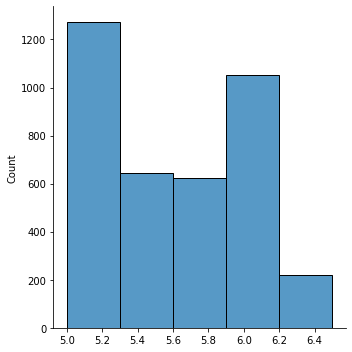

In [165]:
sns.displot(p_train, binwidth=0.3) # PREDICTED TEST DATA